In [16]:
import torch
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn
import torch.optim as optim

In [9]:
import torchvision
import torchvision.transforms as transforms

In [10]:
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [39]:
class LeNet(nn.Module):
    def __init__(self, activation = nn.Tanh()): 
        super(LeNet, self).__init__()
        self.cnn_model = nn.Sequential(
            nn.Conv2d(3, 6, 5),         # (N, 3, 32, 32) -> (N,  6, 28, 28)
            activation,
            nn.AvgPool2d(2, stride=2),  # (N, 6, 28, 28) -> (N,  6, 14, 14)
            nn.Conv2d(6, 16, 5),        # (N, 6, 14, 14) -> (N, 16, 10, 10)  
            activation,
            nn.AvgPool2d(2, stride=2)   # (N,16, 10, 10) -> (N, 16, 5, 5)
        )
        self.fc_model = nn.Sequential(
            nn.Linear(400,120),         # (N, 400) -> (N, 120)
            activation,
            nn.Linear(120,84),          # (N, 120) -> (N, 84)
            activation,
            nn.Linear(84,10)            # (N, 84)  -> (N, 10)
        )
        
    def forward(self, x):
        x = self.cnn_model(x)
        x = x.view(x.size(0), -1)
        x = self.fc_model(x)
        return x

In [12]:
batch_size = 128
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transforms.ToTensor())
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True)
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transforms.ToTensor())
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False)

Files already downloaded and verified
Files already downloaded and verified


In [13]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cpu


In [23]:
def evaluation(dataloader, network):
    total, correct = 0, 0
    for data in dataloader:
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = network(inputs)
        _, pred = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (pred == labels).sum().item()
    return 100 * correct / total

In [31]:
def train(network, optimise, epochs, compute_loss, loss_recorder=[]):
    for epoch in range(epochs):

        for i, data in enumerate(trainloader, 0):

            inputs, labels = data
            inputs, labels = inputs.to(device), labels.to(device)

            optimise.zero_grad()

            outputs = network(inputs)
            loss = compute_loss(outputs, labels)
            loss.backward()
            optimise.step()
        loss_recorder.append(loss.item())    
        print('Epoch: %d/%d' % (epoch, max_epochs))
    

In [32]:
def plot_loss(loss_recorder):
    plt.plot(loss_epoch_arr)
    plt.show()
    

In [33]:
max_epochs = 16 if torch.cuda.is_available() else 3


In [46]:
%%time
net = LeNet().to(device)
loss_epoch_arr = []
train(net, optim.Adam(net.parameters()), max_epochs,nn.CrossEntropyLoss(), loss_epoch_arr)

Epoch: 0/3
Epoch: 1/3
Epoch: 2/3
CPU times: user 2min 1s, sys: 2.11 s, total: 2min 3s
Wall time: 52.9 s


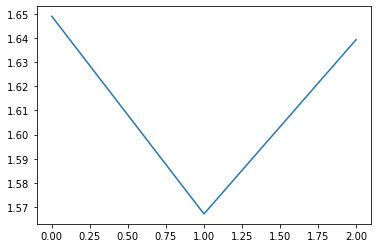

In [47]:
plot_loss(loss_epoch_arr)

In [48]:
print('Test acc: %0.2f, Train acc: %0.2f' % (evaluation(testloader,net), evaluation(trainloader,net)))

Test acc: 46.75, Train acc: 47.79


In [49]:
%%time
net = LeNet(nn.ReLU()).to(device)
loss_epoch_arr = []
train(net, optim.Adam(net.parameters()), max_epochs,nn.CrossEntropyLoss(), loss_epoch_arr)

Epoch: 0/3
Epoch: 1/3
Epoch: 2/3
CPU times: user 1min 51s, sys: 1.92 s, total: 1min 52s
Wall time: 45.4 s


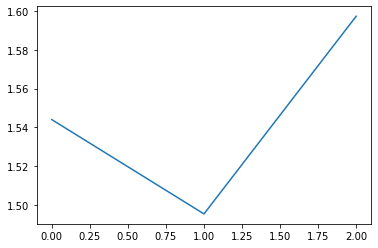

In [50]:
plot_loss(loss_epoch_arr)

In [51]:
print('Test acc: %0.2f, Train acc: %0.2f' % (evaluation(testloader,net), evaluation(trainloader,net)))

Test acc: 49.79, Train acc: 50.36


In [52]:
%%time
net = LeNet(nn.LeakyReLU()).to(device)
loss_epoch_arr = []
train(net, optim.Adam(net.parameters()), max_epochs,nn.CrossEntropyLoss(), loss_epoch_arr)

Epoch: 0/3
Epoch: 1/3
Epoch: 2/3
CPU times: user 1min 56s, sys: 2.19 s, total: 1min 58s
Wall time: 51.5 s


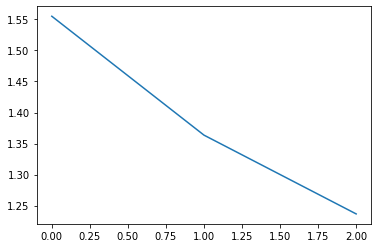

In [53]:
plot_loss(loss_epoch_arr)

In [54]:
print('Test acc: %0.2f, Train acc: %0.2f' % (evaluation(testloader,net), evaluation(trainloader,net)))

Test acc: 48.28, Train acc: 49.12


In [55]:
%%time
net = LeNet(nn.ReLU()).to(device)
loss_epoch_arr = []
train(net, optim.Adam(net.parameters(),weight_decay=0.05), max_epochs,nn.CrossEntropyLoss(), loss_epoch_arr)

Epoch: 0/3
Epoch: 1/3
Epoch: 2/3
CPU times: user 3min 2s, sys: 1.98 s, total: 3min 4s
Wall time: 1min 20s


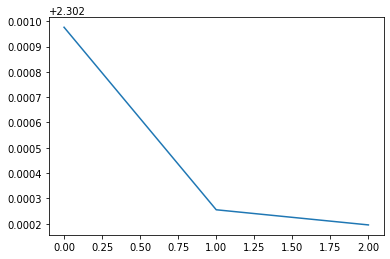

In [56]:
plot_loss(loss_epoch_arr)

In [57]:
print('Test acc: %0.2f, Train acc: %0.2f' % (evaluation(testloader,net), evaluation(trainloader,net)))

Test acc: 10.00, Train acc: 10.00
